In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
sns.set()

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [3]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


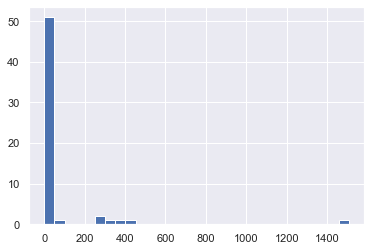

In [29]:
tags.groupby('userId').tag.count().hist(bins=30);

In [10]:
tags.groupby('userId').tag.count().median()

4.0

In [6]:
tags.groupby('userId').tag.count().mean()

63.5

In [11]:
tags.groupby('userId').tag.count().max()

1507

In [7]:
tags.groupby('userId').tag.count().sort_values(ascending=False).head()

userId
474    1507
567     432
62      370
599     323
477     280
Name: tag, dtype: int64

In [14]:
u_tags = tags[tags['userId']==474]
u_tags[u_tags['tag']=='In Netflix queue']

,userId,movieId,tag,timestamp
996,474,28,In Netflix queue,1137201942
1009,474,40,In Netflix queue,1137202107
1037,474,162,In Netflix queue,1137202038
1047,474,232,In Netflix queue,1137201027
1067,474,279,In Netflix queue,1137202159
1071,474,290,In Netflix queue,1137201907
1082,474,326,In Netflix queue,1137201797
1100,474,363,In Netflix queue,1137202123
1136,474,531,In Netflix queue,1137201896
1171,474,728,In Netflix queue,1137202096


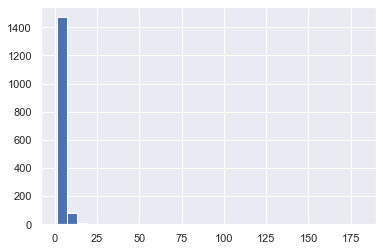

In [30]:
tags.groupby('movieId').tag.count().hist(bins=30);

In [39]:
tags.groupby('movieId').tag.count()

movieId
1          3
2          4
3          2
5          2
7          1
11         2
14         2
16         1
17         1
21         1
22         1
25         1
26         1
28         2
29         1
31         2
32        10
34         3
36         2
38         1
39         7
40         2
41         1
43         1
45         1
46         1
47         3
50         6
52         2
58         1
          ..
144210     2
148626     3
148881     2
152077     2
152711     5
153070     1
155288     2
156371     1
156605     3
158872     5
158966     6
161634     1
164179     7
164909     2
167746     2
168248     8
168252     5
170945     2
174053     5
174055     3
176371     8
176419     3
179401     4
180031     2
180985     1
183611     3
184471     3
187593     3
187595     2
193565     4
Name: tag, Length: 1572, dtype: int64

In [16]:
tags.groupby('movieId').tag.count().mean()

2.3428753180661577

In [17]:
tags.groupby('movieId').tag.count().median()

1.0

In [21]:
year_month = []

for t in tqdm_notebook(tags.timestamp.values):
    d = datetime.fromtimestamp(t)
    year_month.append(str(d.year) + '-' + str(d.month))

In [24]:
display(datetime.fromtimestamp(1445714994))
display(datetime.fromtimestamp(1445714994).year)
display(datetime.fromtimestamp(1445714994).month)
display(datetime.fromtimestamp(1445714994).day)

datetime.datetime(2015, 10, 24, 22, 29, 54)

2015

10

24

In [22]:
tags['year_month'] = np.array(year_month)

In [25]:
tags

,userId,movieId,tag,timestamp,year_month
0,2,60756,funny,1445714994,2015-10
1,2,60756,Highly quotable,1445714996,2015-10
2,2,60756,will ferrell,1445714992,2015-10
3,2,89774,Boxing story,1445715207,2015-10
4,2,89774,MMA,1445715200,2015-10
5,2,89774,Tom Hardy,1445715205,2015-10
6,2,106782,drugs,1445715054,2015-10
7,2,106782,Leonardo DiCaprio,1445715051,2015-10
8,2,106782,Martin Scorsese,1445715056,2015-10
9,7,48516,way too long,1169687325,2007-1


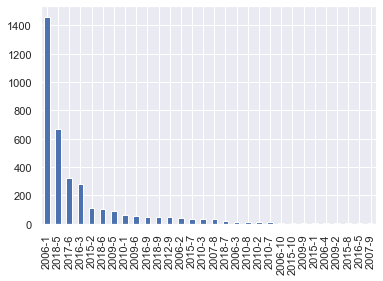

In [31]:
tags.year_month.value_counts()[:30].plot.bar()

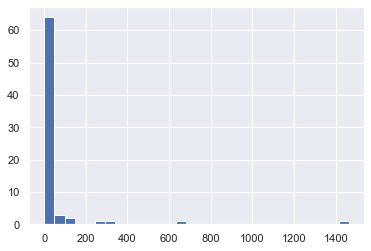

In [32]:
tags.groupby('year_month').tag.count().hist(bins=30)

In [33]:
tags.groupby('year_month').tag.count().mean()

50.45205479452055

In [34]:
tags.groupby('year_month').tag.count().median()

5.0

In [35]:
len('Adventure|Animation|Children|Comedy|Fantasy'.split('|'))

5

In [36]:
num_genres_on_movie = [len(g.split('|')) for g in movies.genres.values]

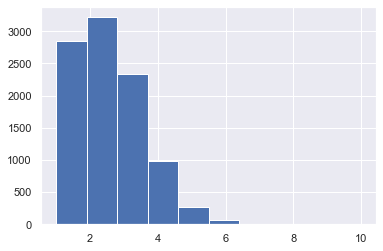

In [37]:
plt.hist(num_genres_on_movie, bins=10);

In [38]:
np.mean(num_genres_on_movie)

2.2668856497639087

In [39]:
np.median(num_genres_on_movie)

2.0